In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import segyio
import glob

from pyfrac.visualisation.plotting_support import explode_volume
from pyfrac.visualisation.traceviz import wiggleplot, multiwiggleplot

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
datadir = './StylolitesData'
glob.glob(datadir+'/*.npz')

['./StylolitesData/StylolitesExp_3StyRndThickRoughness5.npz',
 './StylolitesData/StylolitesExp_3styRoughness5.npz',
 './StylolitesData/StylolitesExp_3StyRoughness1.npz',
 './StylolitesData/StylolitesExp_Clean.npz']

# MODELS

In [34]:
clean_data = np.load(os.path.join(datadir,'StylolitesExp_3StyRoughness1.npz'))
clean_vp = clean_data['vp_mod']
nx,ny,nz = clean_vp.shape

In [35]:
clean_vp_mod = np.load(os.path.join(datadir,'StylolitesExp_Clean.npz'))['vp_mod']
r1_vp_mod = np.load(os.path.join(datadir,'StylolitesExp_3StyRoughness1.npz'))['vp_mod']
r5_vp_mod = np.load(os.path.join(datadir,'StylolitesExp_3styRoughness5.npz'))['vp_mod']
rndthick_vp_mod = np.load(os.path.join(datadir,'StylolitesExp_3StyRndThickRoughness5.npz'))['vp_mod']
rndthick10_vp_mod = np.load(os.path.join(datadir,'StylolitesExp_3StyRndThickRoughness10.npz'))['vp_mod']

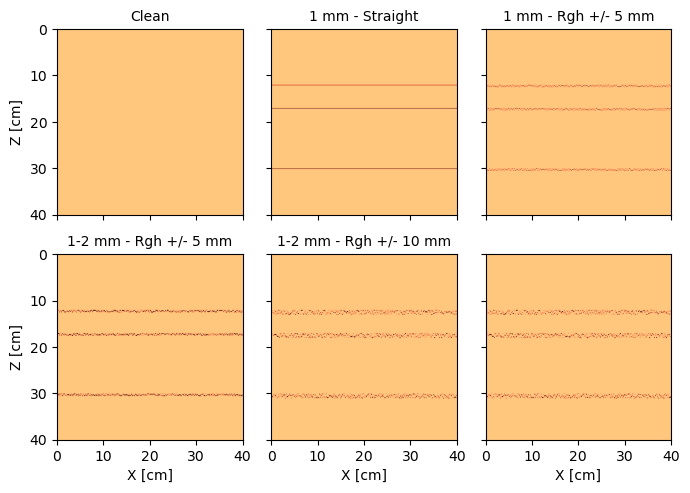

In [61]:
fig,axs = plt.subplots(2,3,figsize=[7,5], sharex=True, sharey=True)
axs.ravel()[0].imshow(clean_vp_mod[:,:,nx//2].T, extent=[0,40,40,0], cmap='copper_r')
axs.ravel()[1].imshow(r1_vp_mod[:,:,nx//2].T, extent=[0,40,40,0], cmap='copper_r')
axs.ravel()[2].imshow(r5_vp_mod[:,:,nx//2].T, extent=[0,40,40,0], cmap='copper_r')
axs.ravel()[3].imshow(rndthick_vp_mod[:,:,nx//2].T, extent=[0,40,40,0], cmap='copper_r')
axs.ravel()[4].imshow(rndthick10_vp_mod[:,:,nx//2].T, extent=[0,40,40,0], cmap='copper_r')
axs.ravel()[5].imshow(rndthick10_vp_mod[:,:,nx//2].T, extent=[0,40,40,0], cmap='copper_r')

axs.ravel()[0].set_title('Clean', fontsize=10)
axs.ravel()[1].set_title('1 mm - Straight', fontsize=10)
axs.ravel()[2].set_title('1 mm - Rgh +/- 5 mm', fontsize=10)
axs.ravel()[3].set_title('1-2 mm - Rgh +/- 5 mm', fontsize=10)
axs.ravel()[4].set_title('1-2 mm - Rgh +/- 10 mm', fontsize=10)

for ax in axs[:,0]: ax.set_ylabel('Z [cm]')
for ax in axs[1]: ax.set_xlabel('X [cm]')
plt.tight_layout()

# SNAPSHOTS

In [62]:
clean_snaps = np.load(os.path.join(datadir,'StylolitesExp_Clean.npz'))['p_snaps']
r1_snaps = np.load(os.path.join(datadir,'StylolitesExp_3StyRoughness1.npz'))['p_snaps']
r5_snaps = np.load(os.path.join(datadir,'StylolitesExp_3styRoughness5.npz'))['p_snaps']
rndthick_snaps = np.load(os.path.join(datadir,'StylolitesExp_3StyRndThickRoughness5.npz'))['p_snaps']
rndthick10_snaps = np.load(os.path.join(datadir,'StylolitesExp_3StyRndThickRoughness10.npz'))['p_snaps']


In [63]:
rndthick10_snaps.shape

(601, 40, 40, 40)

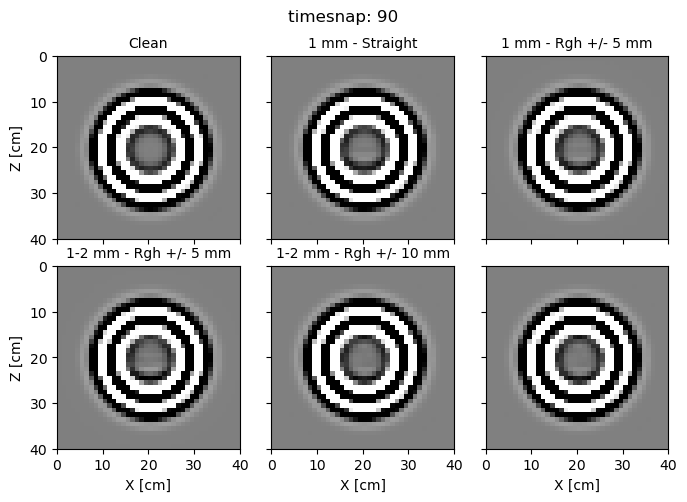

In [91]:
t_snap = 75
vlim=5000

fig,axs = plt.subplots(2,3,figsize=[7,5], sharex=True, sharey=True)
axs.ravel()[0].imshow(clean_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[1].imshow(r1_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[2].imshow(r5_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[3].imshow(rndthick_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[4].imshow(rndthick10_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[5].imshow(rndthick10_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)

axs.ravel()[0].set_title('Clean', fontsize=10)
axs.ravel()[1].set_title('1 mm - Straight', fontsize=10)
axs.ravel()[2].set_title('1 mm - Rgh +/- 5 mm', fontsize=10)
axs.ravel()[3].set_title('1-2 mm - Rgh +/- 5 mm', fontsize=10)
axs.ravel()[4].set_title('1-2 mm - Rgh +/- 10 mm', fontsize=10)

for ax in axs[:,0]: ax.set_ylabel('Z [cm]')
for ax in axs[1]: ax.set_xlabel('X [cm]')

fig.suptitle('timesnap: 90')
plt.tight_layout()

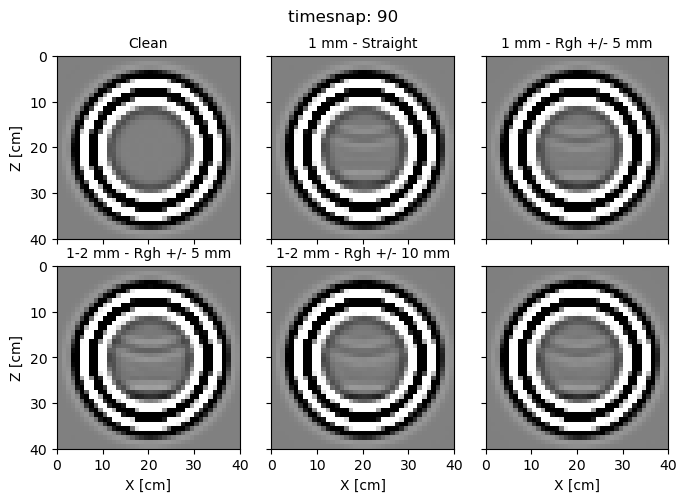

In [90]:
t_snap = 90
vlim=5000

fig,axs = plt.subplots(2,3,figsize=[7,5], sharex=True, sharey=True)
axs.ravel()[0].imshow(clean_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[1].imshow(r1_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[2].imshow(r5_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[3].imshow(rndthick_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[4].imshow(rndthick10_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[5].imshow(rndthick10_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)

axs.ravel()[0].set_title('Clean', fontsize=10)
axs.ravel()[1].set_title('1 mm - Straight', fontsize=10)
axs.ravel()[2].set_title('1 mm - Rgh +/- 5 mm', fontsize=10)
axs.ravel()[3].set_title('1-2 mm - Rgh +/- 5 mm', fontsize=10)
axs.ravel()[4].set_title('1-2 mm - Rgh +/- 10 mm', fontsize=10)

for ax in axs[:,0]: ax.set_ylabel('Z [cm]')
for ax in axs[1]: ax.set_xlabel('X [cm]')

fig.suptitle('timesnap: 90')
plt.tight_layout()

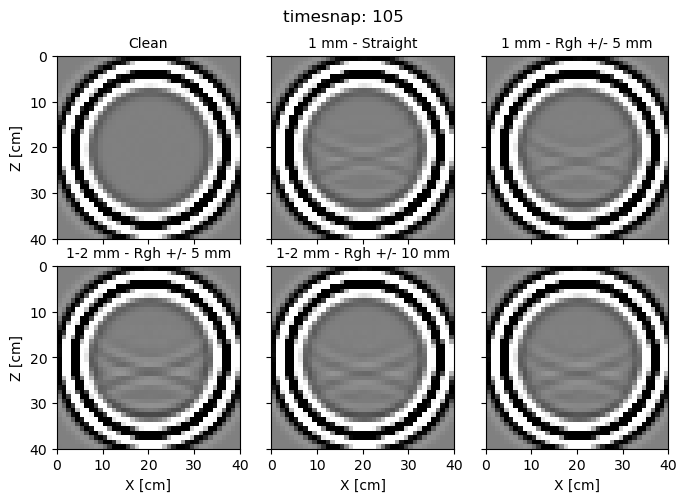

In [88]:
t_snap = 105
vlim=5000

fig,axs = plt.subplots(2,3,figsize=[7,5], sharex=True, sharey=True)
axs.ravel()[0].imshow(clean_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[1].imshow(r1_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[2].imshow(r5_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[3].imshow(rndthick_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[4].imshow(rndthick10_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[5].imshow(rndthick10_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)

axs.ravel()[0].set_title('Clean', fontsize=10)
axs.ravel()[1].set_title('1 mm - Straight', fontsize=10)
axs.ravel()[2].set_title('1 mm - Rgh +/- 5 mm', fontsize=10)
axs.ravel()[3].set_title('1-2 mm - Rgh +/- 5 mm', fontsize=10)
axs.ravel()[4].set_title('1-2 mm - Rgh +/- 10 mm', fontsize=10)

for ax in axs[:,0]: ax.set_ylabel('Z [cm]')
for ax in axs[1]: ax.set_xlabel('X [cm]')

fig.suptitle('timesnap: 105')
plt.tight_layout()

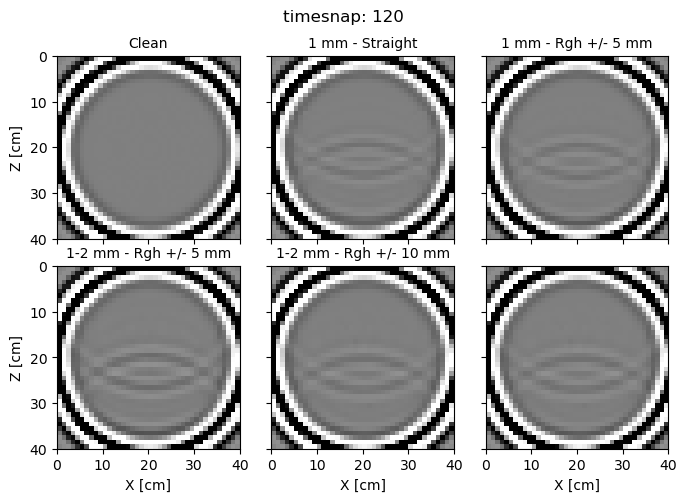

In [85]:
t_snap = 120
vlim=5000

fig,axs = plt.subplots(2,3,figsize=[7,5], sharex=True, sharey=True)
axs.ravel()[0].imshow(clean_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[1].imshow(r1_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[2].imshow(r5_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[3].imshow(rndthick_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[4].imshow(rndthick10_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)
axs.ravel()[5].imshow(rndthick10_snaps[t_snap,:,20,:].T, extent=[0,40,40,0], 
                      cmap='binary', vmin=-vlim, vmax=vlim)

axs.ravel()[0].set_title('Clean', fontsize=10)
axs.ravel()[1].set_title('1 mm - Straight', fontsize=10)
axs.ravel()[2].set_title('1 mm - Rgh +/- 5 mm', fontsize=10)
axs.ravel()[3].set_title('1-2 mm - Rgh +/- 5 mm', fontsize=10)
axs.ravel()[4].set_title('1-2 mm - Rgh +/- 10 mm', fontsize=10)

for ax in axs[:,0]: ax.set_ylabel('Z [cm]')
for ax in axs[1]: ax.set_xlabel('X [cm]')

fig.suptitle('timesnap: 120')
plt.tight_layout()

# WAVEFORMS

In [24]:
clean_waveform = np.load(os.path.join(datadir,'StylolitesExp_Clean.npz'))['vz']
r1_waveform = np.load(os.path.join(datadir,'StylolitesExp_3StyRoughness1.npz'))['vz']
r5_waveform = np.load(os.path.join(datadir,'StylolitesExp_3styRoughness5.npz'))['vz']
rndthick_waveform = np.load(os.path.join(datadir,'StylolitesExp_3StyRndThickRoughness5.npz'))['vz']
rndthick10_waveform = np.load(os.path.join(datadir,'StylolitesExp_3StyRndThickRoughness10.npz'))['vz']


In [6]:
clean_waveform.shape

(150, 400)

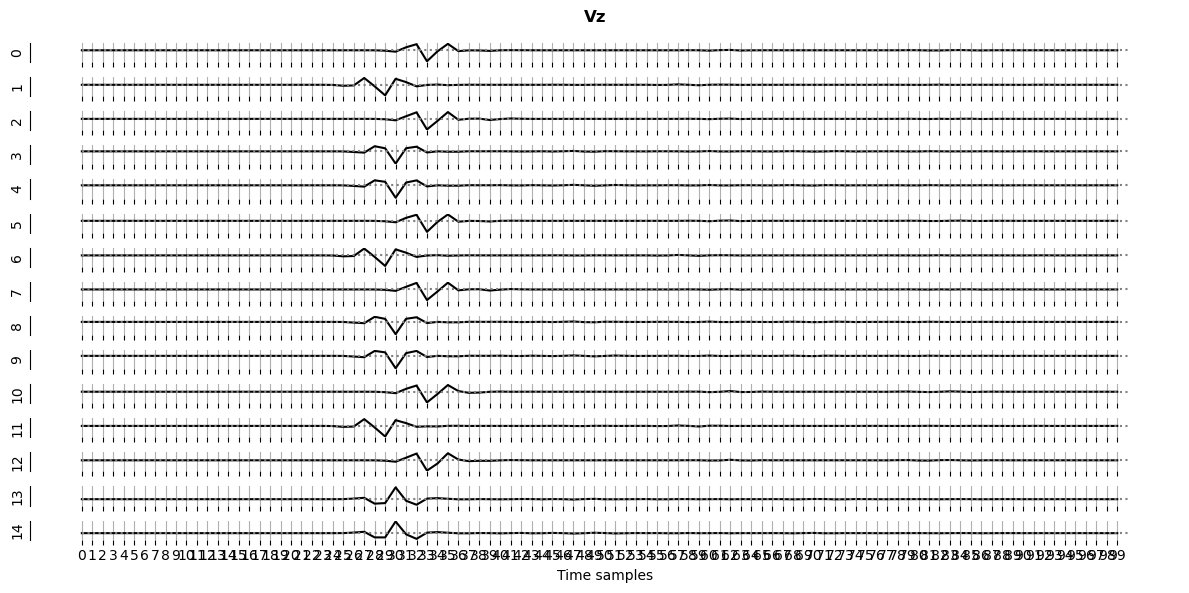

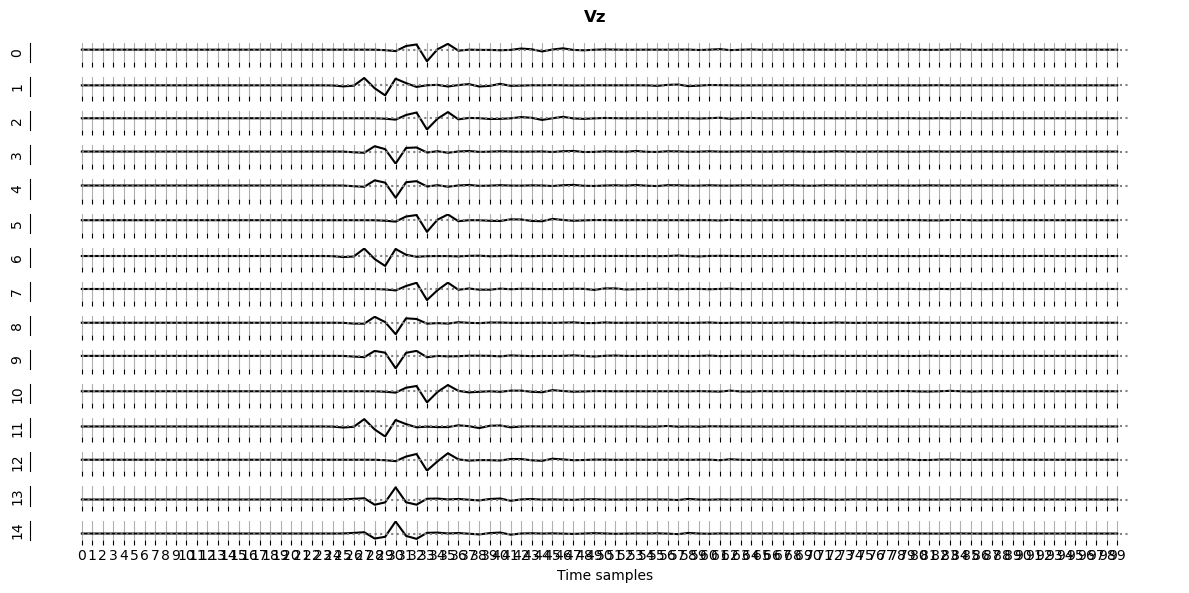

In [14]:
fig,axs = wiggleplot(clean_waveform[::10,:100]);
fig.suptitle('Vz', fontweight='bold')
plt.tight_layout()

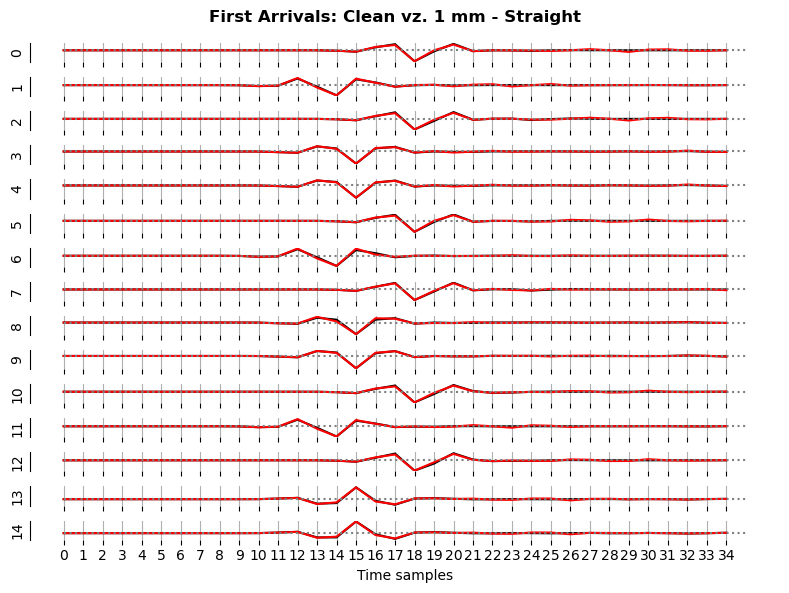

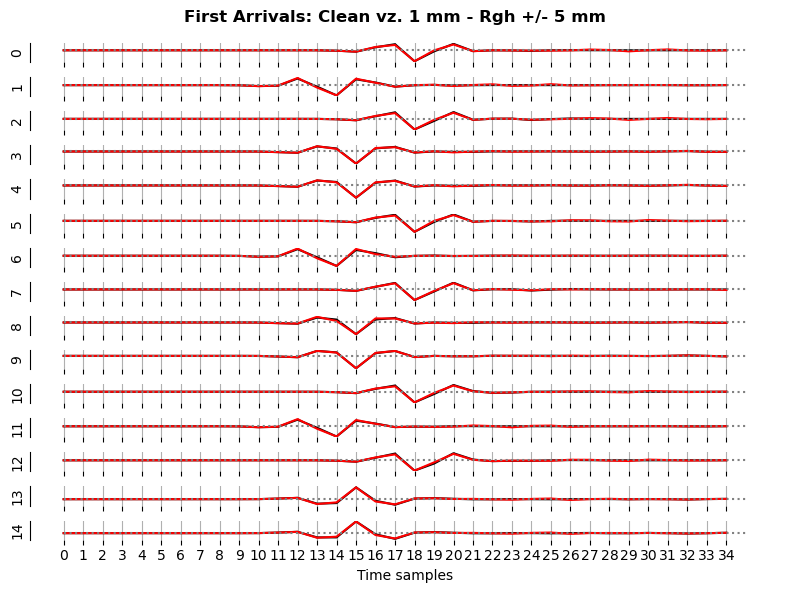

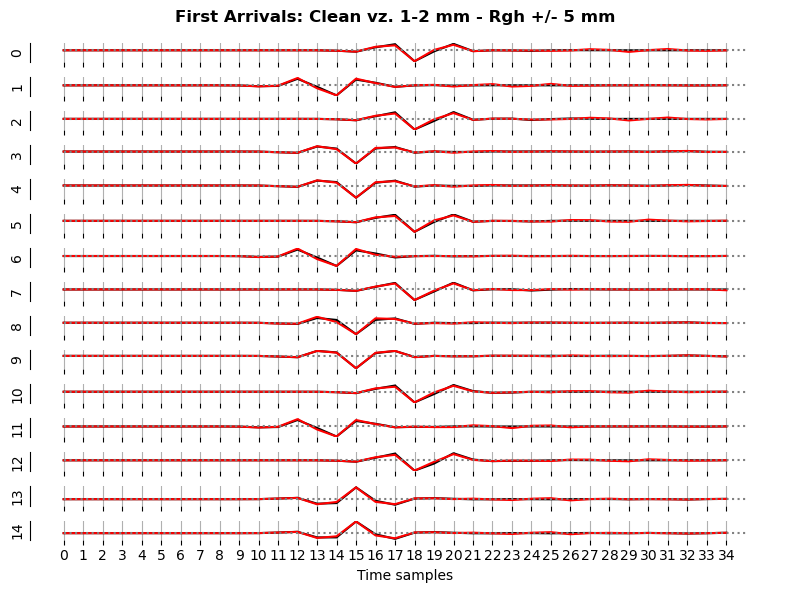

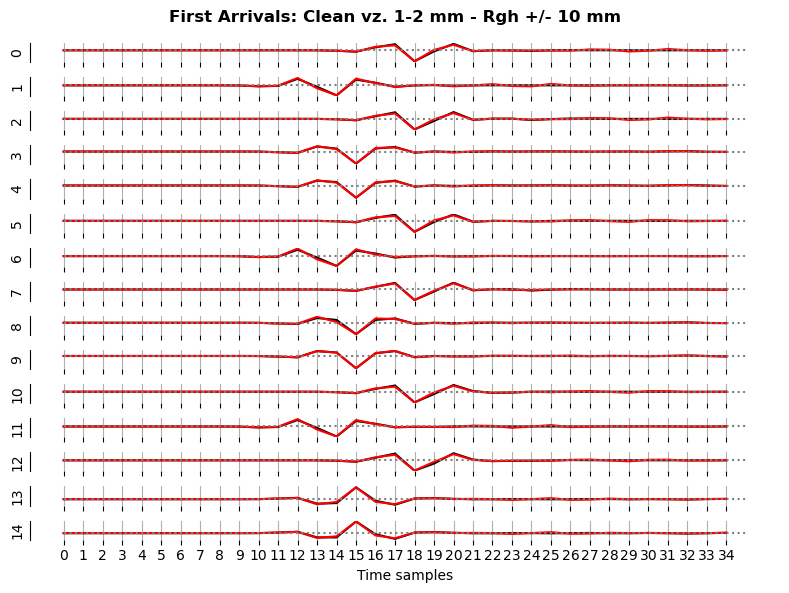

In [104]:
mint = 15
maxt = 50
figsize=[8, 6]
jr = 10

datalist = [clean_waveform[::jr,mint:maxt], r1_waveform[::jr,mint:maxt]]
fig,axs = multiwiggleplot(datalist, figsize=figsize);
fig.suptitle('First Arrivals: Clean vz. 1 mm - Straight', fontweight='bold')
plt.tight_layout()

datalist = [clean_waveform[::jr,mint:maxt], r5_waveform[::jr,mint:maxt]]
fig,axs = multiwiggleplot(datalist, figsize=figsize);
fig.suptitle('First Arrivals: Clean vz. 1 mm - Rgh +/- 5 mm', fontweight='bold')
plt.tight_layout()

datalist = [clean_waveform[::jr,mint:maxt], rndthick_waveform[::jr,mint:maxt]]
fig,axs = multiwiggleplot(datalist, figsize=figsize);
fig.suptitle('First Arrivals: Clean vz. 1-2 mm - Rgh +/- 5 mm', fontweight='bold')
plt.tight_layout()


datalist = [clean_waveform[::jr,mint:maxt], rndthick10_waveform[::jr,mint:maxt]]
fig,axs = multiwiggleplot(datalist, figsize=figsize);
fig.suptitle('First Arrivals: Clean vz. 1-2 mm - Rgh +/- 10 mm', fontweight='bold')
plt.tight_layout()

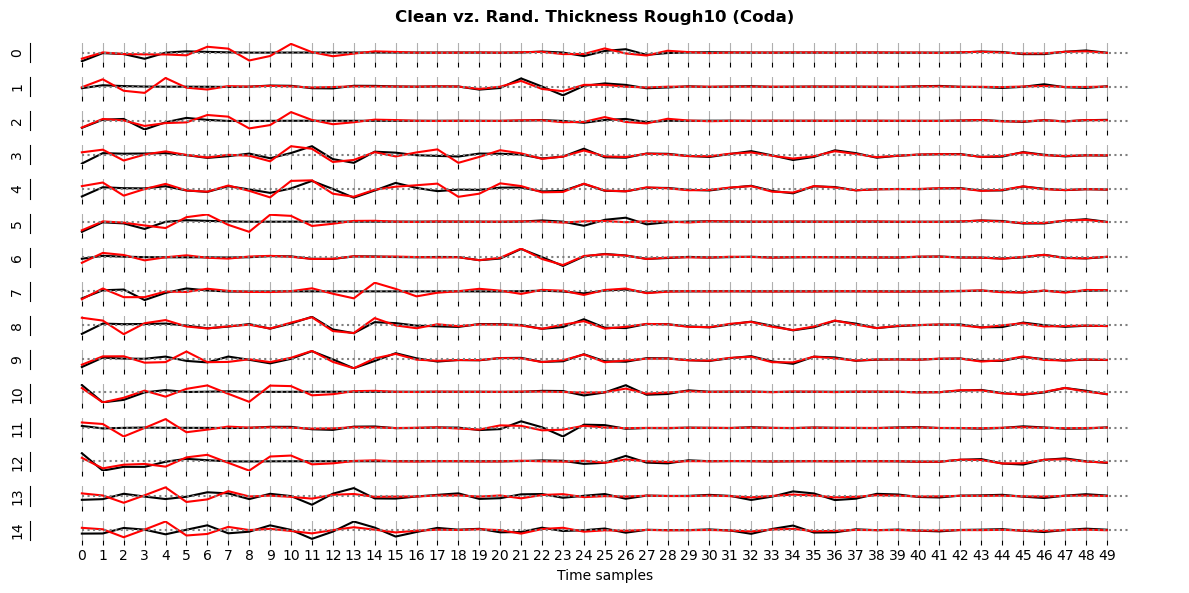

In [102]:
mint = 36
maxt = 36+50

datalist = [clean_waveform[::10,mint:maxt], rndthick10_waveform[::10,mint:maxt]]
fig,axs = multiwiggleplot(datalist);
fig.suptitle('Clean vz. Rand. Thickness Rough10 (Coda)', fontweight='bold')
plt.tight_layout()

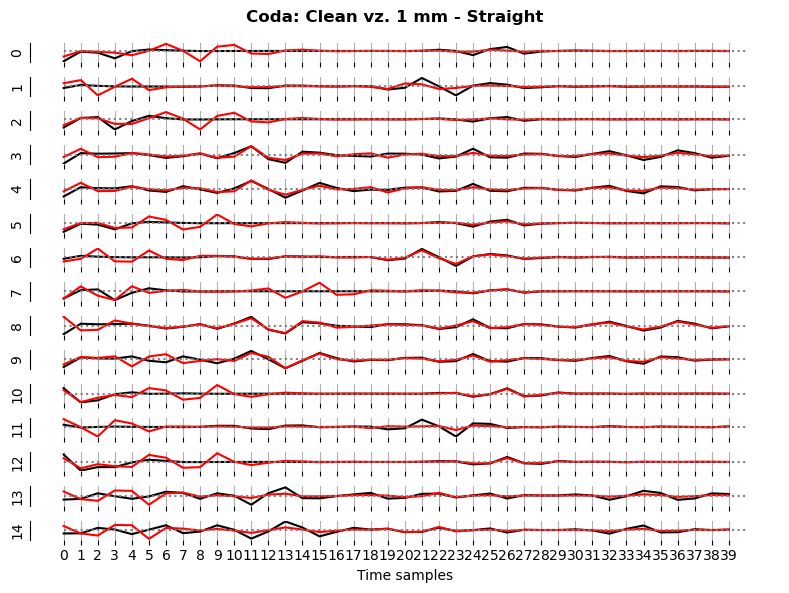

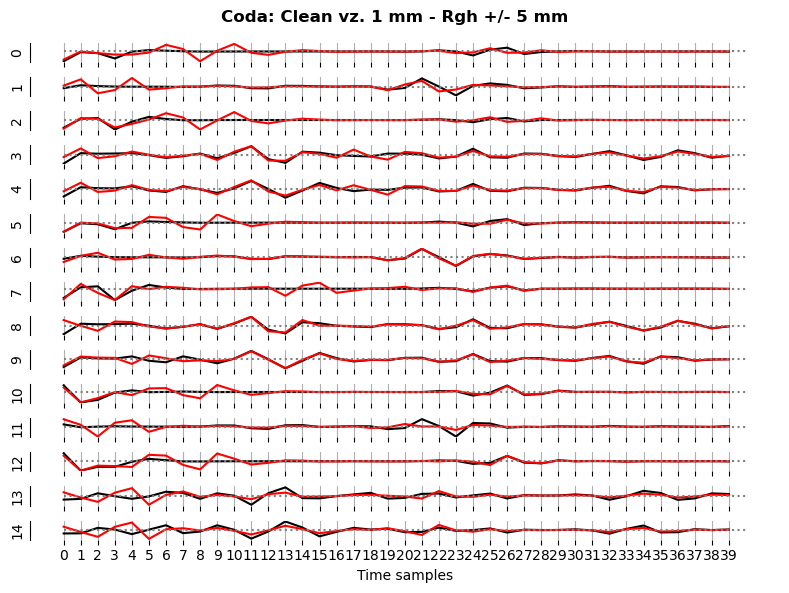

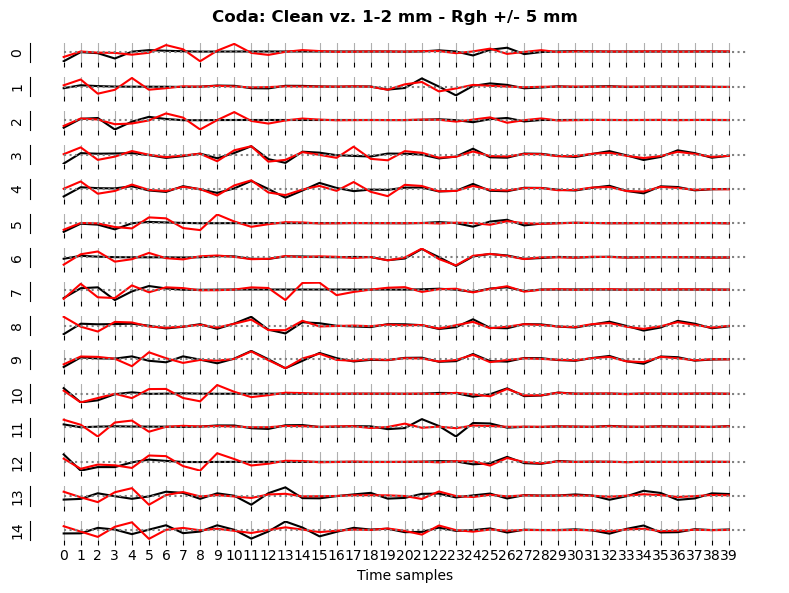

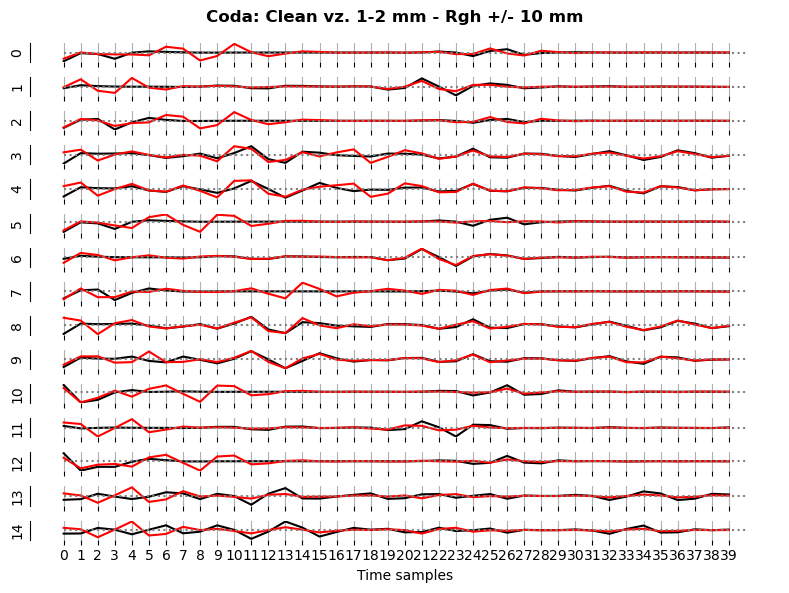

In [105]:
mint = 36
maxt = 36+40
figsize=[8, 6]
jr = 10

datalist = [clean_waveform[::jr,mint:maxt], r1_waveform[::jr,mint:maxt]]
fig,axs = multiwiggleplot(datalist, figsize=figsize);
fig.suptitle('Coda: Clean vz. 1 mm - Straight', fontweight='bold')
plt.tight_layout()

datalist = [clean_waveform[::jr,mint:maxt], r5_waveform[::jr,mint:maxt]]
fig,axs = multiwiggleplot(datalist, figsize=figsize);
fig.suptitle('Coda: Clean vz. 1 mm - Rgh +/- 5 mm', fontweight='bold')
plt.tight_layout()

datalist = [clean_waveform[::jr,mint:maxt], rndthick_waveform[::jr,mint:maxt]]
fig,axs = multiwiggleplot(datalist, figsize=figsize);
fig.suptitle('Coda: Clean vz. 1-2 mm - Rgh +/- 5 mm', fontweight='bold')
plt.tight_layout()


datalist = [clean_waveform[::jr,mint:maxt], rndthick10_waveform[::jr,mint:maxt]]
fig,axs = multiwiggleplot(datalist, figsize=figsize);
fig.suptitle('Coda: Clean vz. 1-2 mm - Rgh +/- 10 mm', fontweight='bold')
plt.tight_layout()

# SOURCE LOCATION

In [172]:
clean_div = np.load(os.path.join(datadir,'StylolitesExp_Clean.npz'))['p']
r1_waveform = np.load(os.path.join(datadir,'StylolitesExp_3StyRoughness1.npz'))['vz']
r5_waveform = np.load(os.path.join(datadir,'StylolitesExp_3styRoughness5.npz'))['vz']
rndthick_waveform = np.load(os.path.join(datadir,'StylolitesExp_3StyRndThickRoughness5.npz'))['vz']
rndthick10_div = np.load(os.path.join(datadir,'StylolitesExp_3StyRndThickRoughness10.npz'))['p']


In [173]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy as sp

from scipy.sparse.linalg import LinearOperator, cg, lsqr

import pylops
from pylops.utils                      import dottest
from pylops.utils.wavelets             import *
from pylops.optimization.sparsity  import *

# EXPERIMENT PARAMS
from pyfrac.hydrafrac.acquisition import recgeom,rec2das_datatrnsfrm,dasgeom

# LOCATION
from pyfrac.pseudodas.receiveroperators import cubePDoperator
from pyfrac.imaging.kirchhoff import Kirchhoff
from pyfrac.utils.localisationutils import get_max_locs

# VISUALISATION
from pyfrac.visualisation.traceviz import traceimage, wiggleplot
from pyfrac.visualisation.eventimages import locimage3d

In [174]:
expname = 'StylolitesTest_pointrecs'
outpath = '../../FDModelling/StylolitesTest_pointrecs/'

In [199]:
# MODEL PARAMS
abs_bounds = 30
dx = dy = dz = 0.001  # 1mm
dimlims = 0.4 
nx = ny = nz = int(dimlims/dx) 
x, y, z = np.arange(nx)*dx, np.arange(ny)*dy, np.arange(nz)*dz
v0 = 5260

# RECEIVERS
recs = np.loadtxt(os.path.join(outpath,'inputs/receiver.dat')).T
recs = recs - (abs_bounds*dx)
nr = recs.shape[1]

In [200]:
print(recs)

[[0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
  0.001  0.001  0.001  0.001  0.001  0.4    0.4    0.4    0.4    0.4
  0.4    0.4    0.4    0.4    0.4    0.4    0.4    0.4    0.4    0.4
  0.4    0.4    0.4    0.4    0.4    0.4    0.4    0.4    0.4    0.4
  0.011  0.011  0.011  0.011  0.011  0.1057 0.1057 0.1057 0.1057 0.1057
  0.2005 0.2005 0.2005 0.2005 0.2005 0.2952 0.2952 0.2952 0.2952 0.2952
  0.39   0.39   0.39   0.39   0.39   0.011  0.011  0.011  0.011  0.011
  0.1057 0.1057 0.1057 0.1057 0.1057 0.2005 0.2005 0.2005 0.2005 0.2005
  0.2952 0.2952 0.2952 0.2952 0.2952 0.39   0.39   0.39   0.39   0.39
  0.011  0.1057 0.2005 0.2952 0.39   0.011  0.1057 0.2005 0.2952 0.39
  0.011  0.1057 0.2005 0.2952 0.39   0.011  0.1057 0.2005 0.2952 0.39
  0.011  0.1057 0.2005 0.2952 0.39   0.011  0.1057 0.2005 0.2952 0.39
  0.011  0.1057 0.2005 0.2952 0.39   0.011  0.1057 0.2005 0.2952 0.39
  0.011  0.105

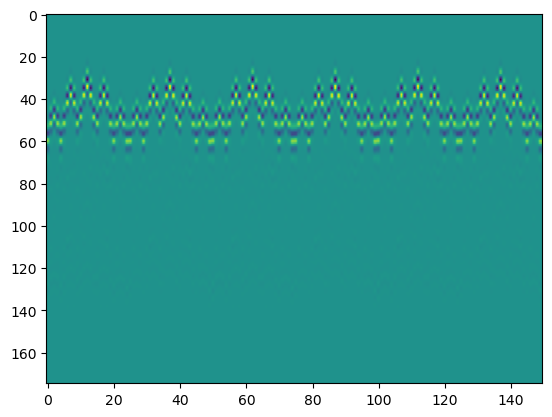

In [206]:
vz = clean_div[:,25:]
vz.shape
plt.imshow(vz.T, aspect='auto')

/home/birniece/miniconda3/envs/pyfrac/lib/python3.9/site-packages/pylops/utils/wavelets.py:21: UserWarning: one sample removed from time axis...
  warnings.warn("one sample removed from time axis...")


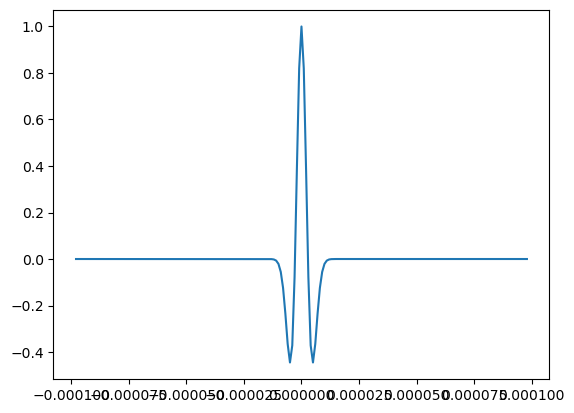

In [208]:
# TIME AXIS AND WAVELET
dt = 1e-6
nt = vz.shape[1]
t = np.arange(nt)*dt

fc = 80000
wav, wavt, wavc = ricker(t[:100], f0=fc)
plt.plot(wavt,wav)

In [209]:
# Reduce modelling dims for inversion
dx = dy = dz = 0.01  # 1mm
dimlims = 0.4 
nx = ny = nz = int(dimlims/dx) 
x, y, z = np.arange(nx)*dx, np.arange(ny)*dy, np.arange(nz)*dz
v0 = 5260

In [210]:
# INITIALISE OPERATOR
Op = Kirchhoff(z=z, 
               x=x, 
               y=y, 
               t=t, 
               srcs=recs[:, :1], 
               recs=recs, 
               vel=v0, 
               wav=wav, 
               wavcenter=wavc, 
               mode='analytic', 
               engine='numba')

# check operator with dottest
_ = dottest(Op, verb=True)

/home/birniece/Documents/Projects/MicroseismicModelling/MicroseismicProcessing/pyfrac/imaging/kirchhoff.py:261: FutureWarning: A new implementation of Kirchhoff is provided in v2.1.0. This currently affects only the inner working of the operator, end-users can continue using the operator in the same way. Nevertheless, it is now recommended to providethe variables trav (and amp) as a tuples containing the traveltime (and amplitude) tables for sources and receivers separately. This behaviour will eventually become default in version v3.0.0.
  warnings.warn(


Dot test passed, v^H(Opu)=-8640.188764853889 - u^H(Op^Hv)=-8640.188764853876


Text(0.5, 1.0, 'Point Receivers')

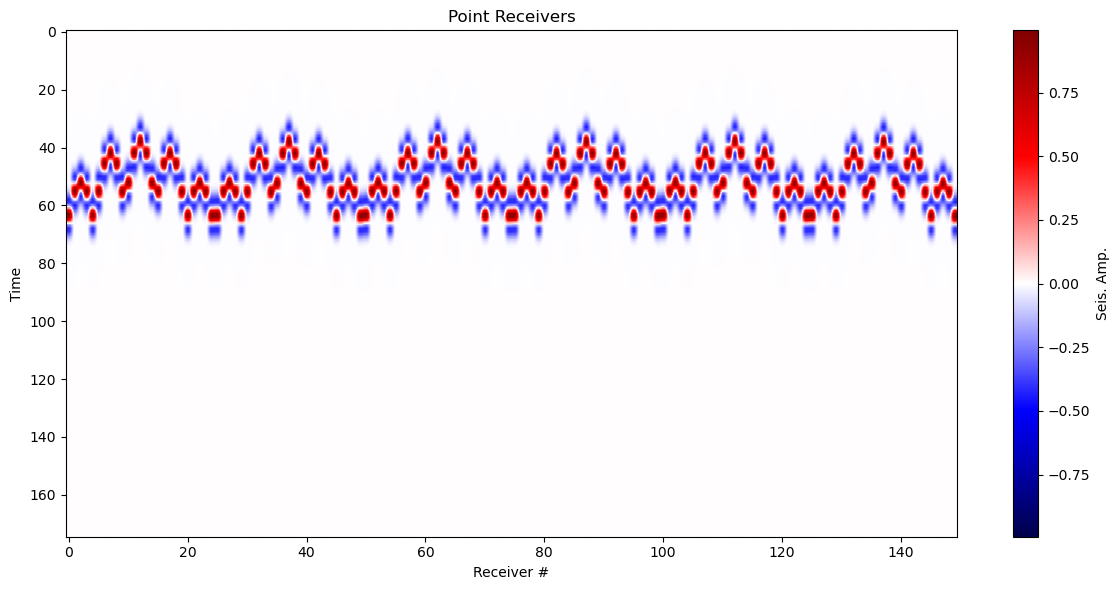

In [211]:
sx, sy, sz = [nx//2, ny//2, nz//2]
microseismic = np.zeros((nx, ny, nz))
microseismic[sx, sy, sz] = 1.

frwddata_1d = Op @ microseismic.flatten().squeeze()
frwddata  = frwddata_1d.reshape(nr,nt)
fig,ax = traceimage(frwddata, climQ=99.99)
ax.set_title('Point Receivers')

Text(0.5, 1.0, 'Point Receivers')

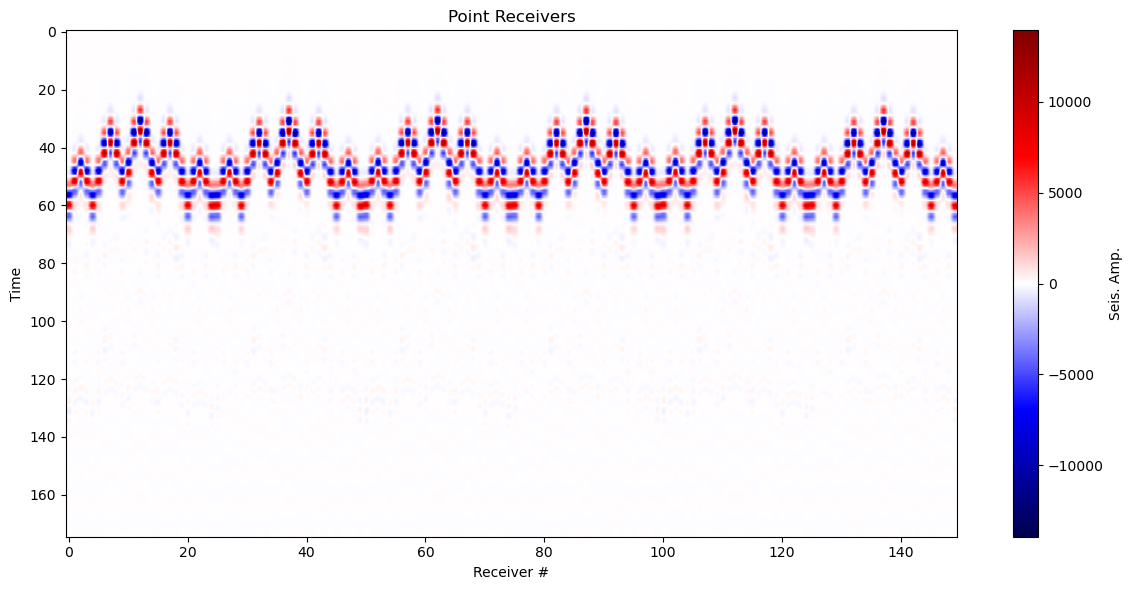

In [212]:
fig,ax = traceimage(vz, climQ=99.99)
ax.set_title('Point Receivers')

Migration-Based Hypo Center: [19.8 19.8 19.8]


/home/birniece/Documents/Projects/MicroseismicModelling/MicroseismicProcessing/pyfrac/visualisation/eventimages.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Text(0.5, 0.98, 'LSM: 1-2 mm - Rgh +/- 10 mm')

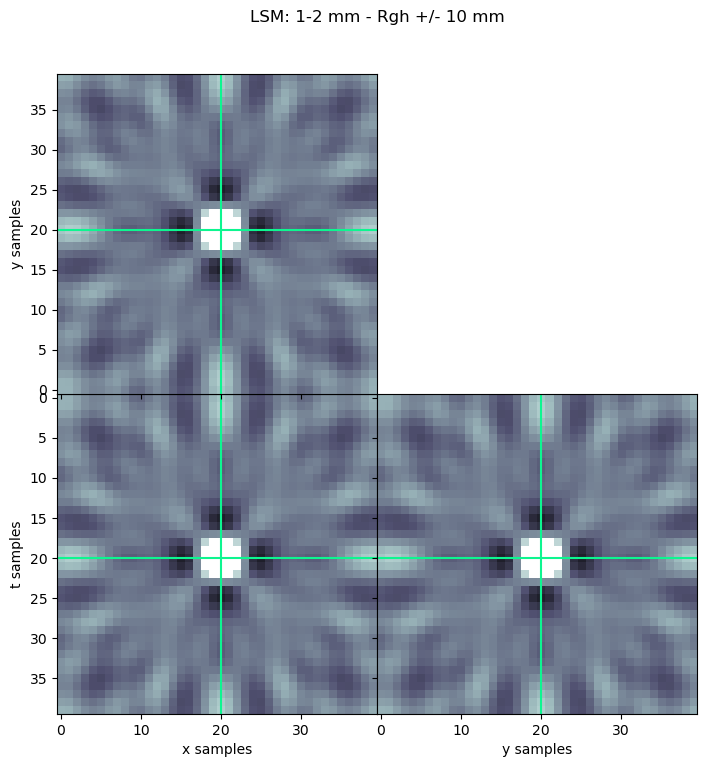

In [213]:
migrated = (Op.H @ frwddata).reshape(nx,ny,nz)
hc, hcs =  get_max_locs(migrated, n_max=10, rem_edge=False)
print('Migration-Based Hypo Center:',hc.flatten())
fig,axs = locimage3d(migrated,20,20)
fig.suptitle('LSM: 1-2 mm - Rgh +/- 10 mm')

Migration-Based Hypo Center: [20.  21.2 21.2]


Text(0.5, 0.98, 'LSM: 1-2 mm - Rgh +/- 10 mm')

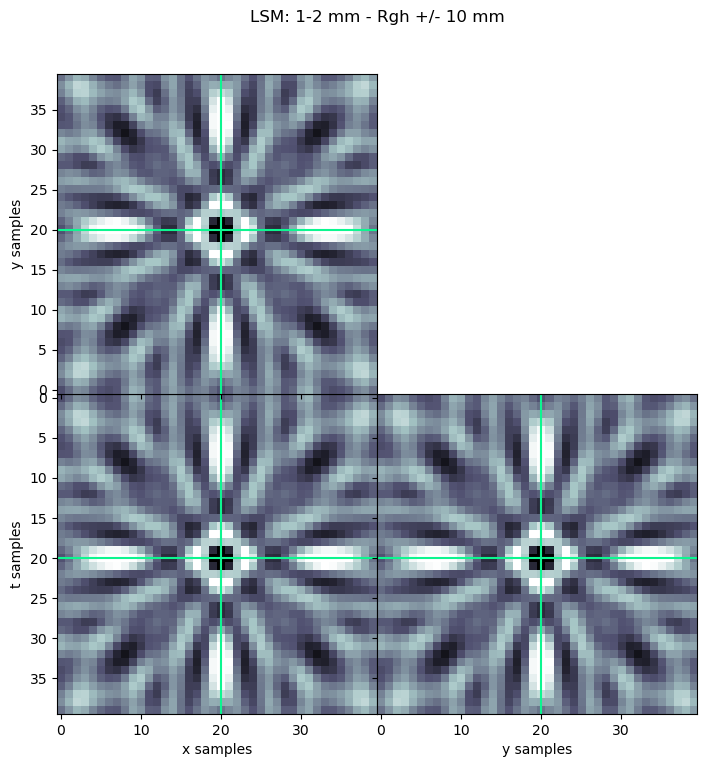

In [214]:
migrated = (Op.H @ vz).reshape(nx,ny,nz)
hc, hcs =  get_max_locs(migrated, n_max=10, rem_edge=False)
print('Migration-Based Hypo Center:',hc.flatten())
fig,axs = locimage3d(migrated,20,20)
fig.suptitle('LSM: Clean')